In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "20220110_wbjet_1"

path = "/users/yewzzang/work/HEPGNN_4top/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_feature.csv"
feature_path = glob.glob(path)
feature_list = [file for file in feature_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_batch.csv"
batch_path = glob.glob(path)
batch_list = [file for file in batch_path if file.endswith(".csv")]





d = train_list
dd = pred_list
ddd = feature_list

ddddd = batch_list


In [3]:
dd

['/users/yewzzang/work/HEPGNN_4top/result/20220110_wbjet_1/20220110_wbjet_1.csv']

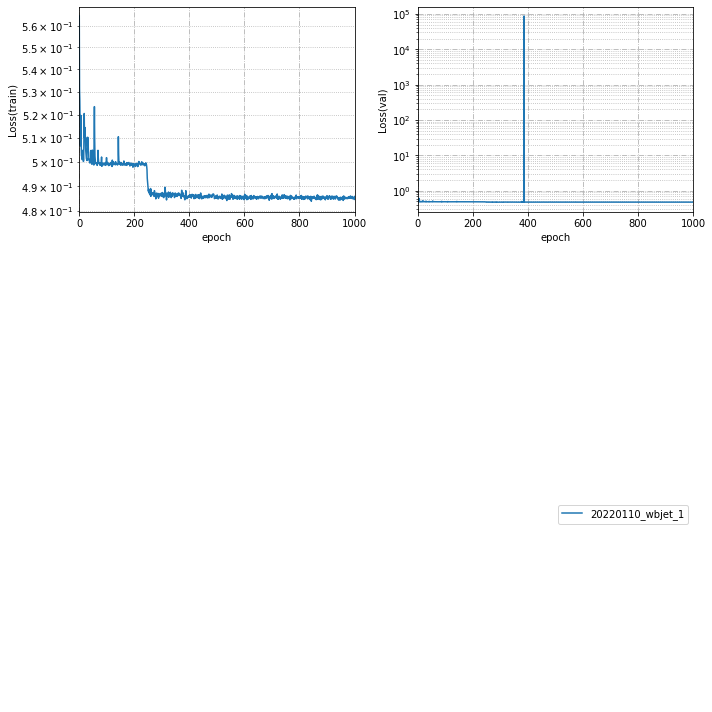

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(3, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(3, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
# ax1 = plt.subplot(3, 2, 1, ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(3, 2, 2, ylabel='Loss(val)', xlabel='epoch')
# ax3 = plt.subplot(3, 2, 3, ylabel='Accuracy(train)', xlabel='epoch')
# ax4 = plt.subplot(3, 2, 4, ylabel='Accuracy(val)', xlabel='epoch')
# ax1.set_ylim([0, 100])
# ax2.set_ylim([0, 100])
# ax3.set_ylim([0.0,1.1])
# ax4.set_ylim([0.0,1.1])
for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,1000])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])
    
    label = d[i].split('/')[-2].replace('__', ' ')
    if label.split('_')[0] == '210817':
        l =  ax1.plot(df['loss'], linewidth=2)
        ax2.plot(df['val_loss'], linewidth=2)
#         ax3.plot(df['acc'], linewidth=2)
#         ax4.plot(df['val_acc'], linewidth=2)
    else:
        l =  ax1.plot(df['loss'])
        ax2.plot(df['val_loss'])
#         ax3.plot(df['acc'])
#         ax4.plot(df['val_acc'])
    
    
    
    
#     label = ddd[i]
    
    
    
    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels)
# ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

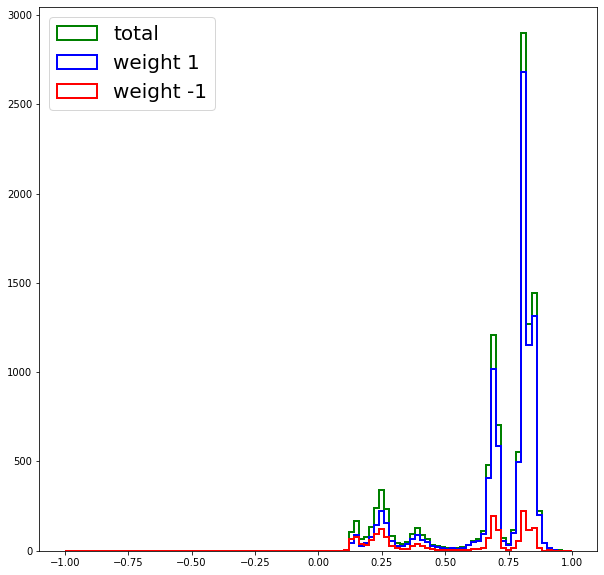

In [5]:
##### from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
     

plt.hist(df['prediction'], histtype='step', linewidth=2,
             density=False, bins=100, color='green',label='total',range=(-1,1)) 

plt.hist(df['prediction'][df['weight'] == 1], histtype='step', linewidth=2,
             density=False, bins=100, color='blue',label='weight 1',range=(-1,1))   

plt.hist(df['prediction'][df['weight'] == -1], histtype='step', linewidth=2,
             density=False, bins=100, color='red',label='weight -1',range=(-1,1))  
plt.legend(loc='upper left', fontsize = 20)

plt.show()

In [6]:
(df['prediction'][df['weight'] == -1] >0.25).sum()

1352

In [7]:
(df['prediction'][df['weight'] == -1] <0.25).sum()

427

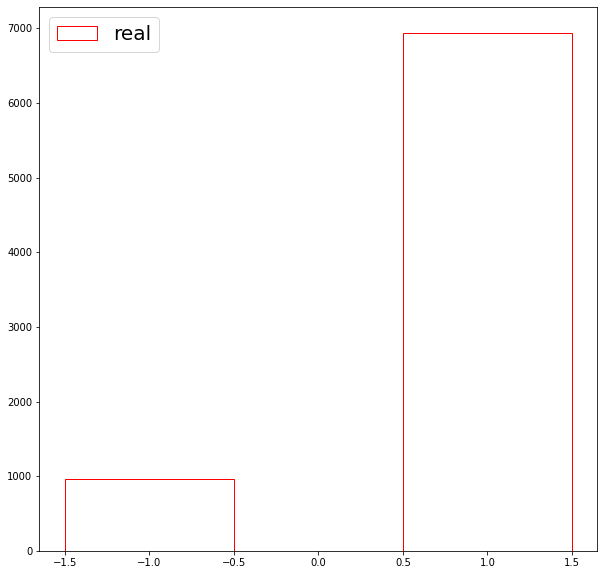

In [8]:
# from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
# plt.hist(df['prediction'], histtype='step', 
#              density=True, bins=100, color='blue',label='pred',range=(-1,1))        
plt.hist(df['weight'], histtype='step', 
             density=False, bins = 3, color='red',label='real',range=(-1.5,1.5),weights = df['prediction']) 

plt.legend(loc='upper left', fontsize = 20)

plt.show()

In [9]:
# ##### from sklearn.metrics import roc_curve, roc_auc_score


# #plt.yscale('log')
# plt.figure(figsize=(10,10))
# df = pd.read_csv(dd[0])
# plt.hist(df['prediction'][df['weight'] == 1], histtype='step', linewidth=2,
#              density=True, bins=100, color='blue',label='weight 1',range=(-1,1))        
# plt.hist(df['prediction'], histtype='step', linewidth=2,
#              density=True, bins=100, color='green',label='total',range=(-1,1)) 
# plt.hist(df['prediction'][df['weight'] == -1], histtype='step', linewidth=2,
#              density=True, bins=100, color='red',label='weight -1',range=(-1,1))  
# plt.legend(loc='upper left', fontsize = 20)

# plt.show()




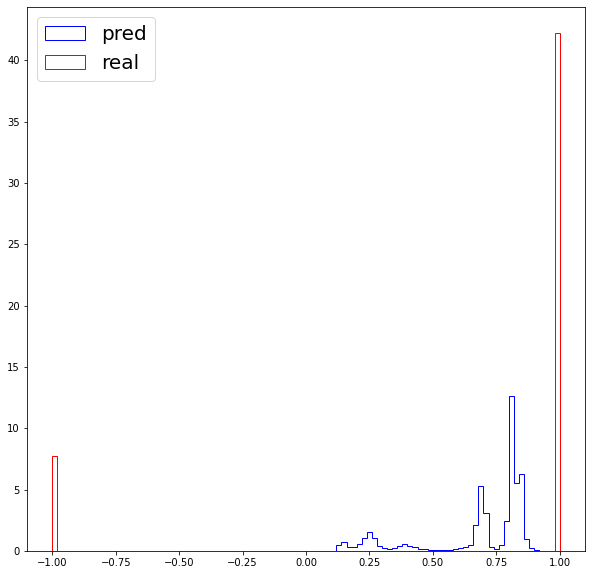

In [10]:
# from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(df['prediction'], histtype='step', 
             density=True, bins=100, color='blue',label='pred',range=(-1,1))        
plt.hist(df['weight'], histtype='step', 
             density=True, bins=100, color='red',label='real',range=(-1,1)) 

plt.legend(loc='upper left', fontsize = 20)

plt.show()

In [11]:
print(df['prediction'].max(),'max')
print(df['prediction'].min(),'min')
print(np.average(df['prediction']),'pred average')
print(np.average(df['weight']),'real average')

1.1977910995483398 max
0.1095594689249992 min
0.6897402624201148 pred average
0.6893119105833042 real average


In [12]:
###### max mass
df3 = pd.read_csv(ddd[0])     ### feature
df4 = pd.read_csv(ddddd[0])   ### batch
df4 = np.array(df4)
df3 = np.array(df3).reshape(-1,4)  ## mass /px/py/pz
#### 각 batch 안에서 최대 max pt의 feature들 뽑기
a = 0
max_mass_features = []
for i in range(len(df4)):
    mass = df3[a:a+df4[i][0]][:,0]

    aaaa = np.where(mass == mass.max())

    
    max_mass_particle = df3[a+aaaa[0]]
 
    max_mass_features.append(max_mass_particle)
    a += df4[i][0]


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

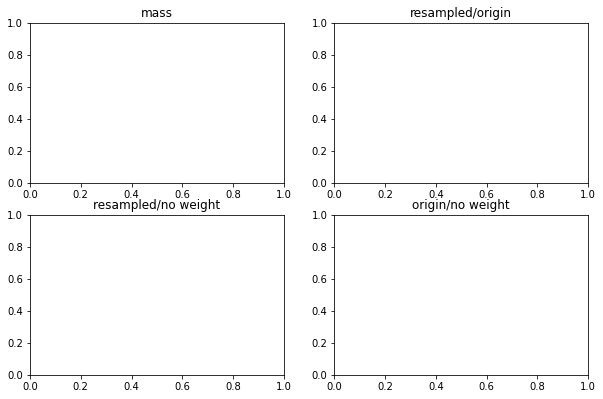

In [13]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'mass')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,0], 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,0], histtype='step', 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,0], histtype='step', 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], ns1/ns2,width=2)
ax3.bar(bins0[1:], ns1/ns0,width=2)
ax4.bar(bins0[1:], ns2/ns0,width=2)
ax1.set_xlim([160,200])
ax2.set_xlim([160,200])
ax3.set_xlim([160,200])
ax4.set_xlim([160,200])




In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'px')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,1], 
             density=False, bins=np.arange(-6,6,step=0.6), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.6), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.6), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.5)
ax3.bar(bins0[1:], (ns1/ns0),width=0.5)
ax4.bar(bins0[1:], (ns2/ns0),width=0.5)
ax1.set_xlim([-7,7])
ax2.set_xlim([-7,7])
ax3.set_xlim([-7,7])
ax4.set_xlim([-7,7])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'py')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,2], 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.5)
ax3.bar(bins0[1:], (ns1/ns0),width=0.5)
ax4.bar(bins0[1:], (ns2/ns0),width=0.5)
ax1.set_xlim([-6,6])
ax2.set_xlim([-6,6])
ax3.set_xlim([-6,6])
ax4.set_xlim([-6,6])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'pz')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,3], 
             density=False, bins=np.arange(-500,500,step=35), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,3], histtype='step', 
             density=False, bins=np.arange(-500,500,step=35), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,3], histtype='step', 
             density=False, bins=np.arange(-500,500,step=35), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=35)
ax3.bar(bins0[1:], (ns1/ns0),width=35)
ax4.bar(bins0[1:], (ns2/ns0),width=35)
ax1.set_xlim([-600,600])
ax2.set_xlim([-600,600])
ax3.set_xlim([-600,600])
ax4.set_xlim([-600,600])



ax1.legend(loc='best')

plt.show()

In [ ]:
# import ROOT
# from root_numpy import array2root, root2array
# import uproot
# canv = ROOT.TCanvas()
# h1 = ROOT.TH1F('h1','histogram 1; resample',100,-1,1) ### xbin, xmin, xmax
# h2 = ROOT.TH1F('h2','histogram 1; resample',100,-1,1) ### xbin, xmin, xmax
# h3 = ROOT.TH1F('h3','histogram 1; resample',100,-1,1) ### xbin, xmin, xmax



# for i in range(len(x)):
#     h1.Fill(float(x[i]))
#     h1.SetLineColor(ROOT.kGreen)
# for i in range(len(x)):
#     if (df['weight'][i] == 1):
#         h2.Fill(float(x[i]))
#         h2.SetLineColor(ROOT.kBlue)
# for i in range(len(x)):
#     if (df['weight'][i] == -1):
#         h3.Fill(float(x[i]))
#         h3.SetLineColor(ROOT.kRed)
        

# # 


# h3.Draw()
# h2.Draw("same")
# h1.Draw("same")
# canv.Draw()